In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv("flights.csv")


In [3]:
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [5]:
data.corr(numeric_only=True)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
id,1.000000,NaN,0.071779,0.087852,0.002172,0.004076,0.049713,-0.024680,-0.013373,0.018613,0.002676,-0.032866,0.012526,0.003150,0.022619
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.071779,NaN,1.000000,0.002942,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,-0.000834,0.010924,0.021636,-0.005227,0.015528
day,0.087852,NaN,0.002942,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791,0.002236,0.003041,-0.000055,0.000987
dep_time,0.002172,NaN,-0.003932,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,0.004076,NaN,-0.004573,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495,-0.015532,-0.017995,0.999148,0.082960
dep_delay,0.049713,NaN,-0.020057,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734,-0.022405,-0.021671,0.198226,0.028441
arr_time,-0.024680,NaN,-0.002520,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.025042,0.054296,0.046991,0.642651,0.040969
sched_arr_time,-0.013373,NaN,-0.004173,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.021594,0.078918,0.068726,0.783283,0.050321
arr_delay,0.018613,NaN,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522


# dep_time

<Axes: >

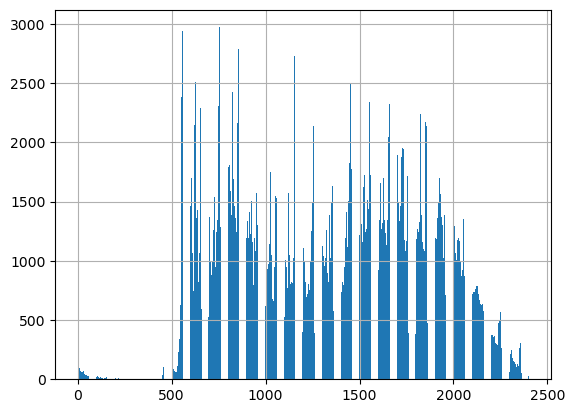

In [7]:
data["dep_time"].hist(bins=580)

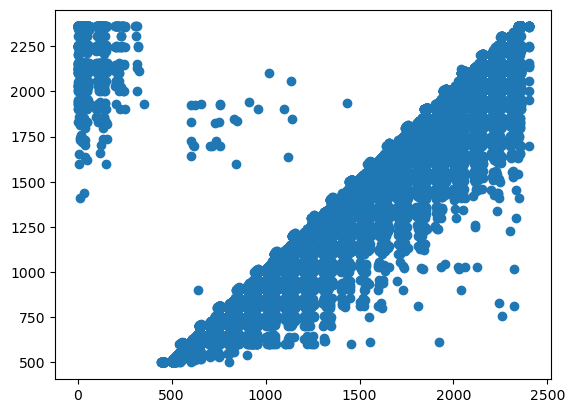

In [9]:
plt.scatter(data["dep_time"],data["sched_dep_time"])

In [7]:
data["dep_time"].describe() 

count    328521.000000
mean       1349.109947
std         488.281791
min           1.000000
25%         907.000000
50%        1401.000000
75%        1744.000000
max        2400.000000
Name: dep_time, dtype: float64

In [8]:
data["dep_time"].mode()

0    555.0
Name: dep_time, dtype: float64

# dep_delay

In [11]:
data["dep_delay"].describe()

count    328521.000000
mean         12.639070
std          40.210061
min         -43.000000
25%          -5.000000
50%          -2.000000
75%          11.000000
max        1301.000000
Name: dep_delay, dtype: float64

In [17]:
data["dep_delay"].mode()

0   -5.0
Name: dep_delay, dtype: float64

In [16]:
stats.trim_mean(data["dep_delay"], 0.1)

4.798201334709118

<Axes: >

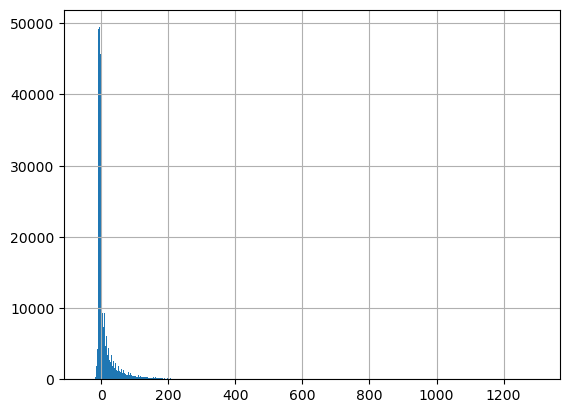

In [14]:
data["dep_delay"].hist(bins=580)

In [15]:
data["dep_delay"].skew()

4.802540511080034

In [16]:
data["dep_delay"].kurtosis()

43.95011602901041

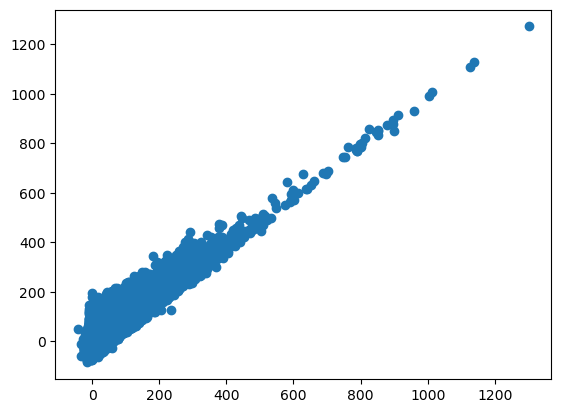

In [7]:
plt.scatter(data["dep_delay"],data["arr_delay"])

# arr_time

In [8]:
data["arr_time"].describe()

count    328063.000000
mean       1502.054999
std         533.264132
min           1.000000
25%        1104.000000
50%        1535.000000
75%        1940.000000
max        2400.000000
Name: arr_time, dtype: float64

In [18]:
data["arr_time"].mode()

0    1008.0
Name: arr_time, dtype: float64

In [14]:
stats.trim_mean(data["arr_time"], 0.1)

1548.448430343476

<Axes: >

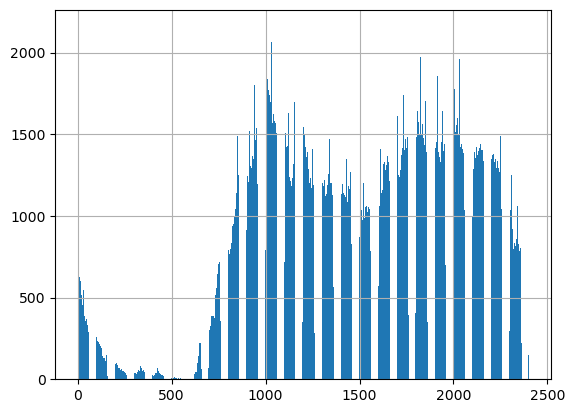

In [19]:
data["arr_time"].hist(bins=580)

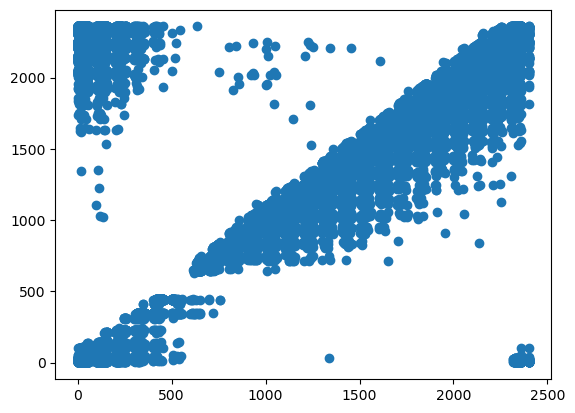

In [20]:
plt.scatter(data["arr_time"],data["sched_arr_time"])